# WASP-39b NIRISS comparison

**Author:** Hannu Parviainen </br>
**Edited:** 2025-08-08 </br>
**ExoIris version:** 0.19

This notebook compares the WASP-39b ExoIris results with the [Carter et al. (2024)](https://www.nature.com/articles/s41550-024-02292-x) results.

In [9]:
import pandas as pd
from matplotlib.pyplot import subplots, setp, rc
from exoiris import load_model, ExoIris

rc('figure', figsize=(14, 4))

In [2]:
spc1 = pd.read_csv('data/ZENODO/4_TRANSMISSION_SPECTRA/Fixed_LimbDarkening/NIRISS_SOSS_Order1/bins_scale5.csv')
spc2 = pd.read_csv('data/ZENODO/4_TRANSMISSION_SPECTRA/Fixed_LimbDarkening/NIRISS_SOSS_Order2/bins_scale5.csv')

In [3]:
sp_wn = load_model('WASP-39b-NIRISS-wn.fits').transmission_spectrum
m_gp = load_model('WASP-39b-NIRISS-gp.fits')
sp_gp = m_gp.transmission_spectrum

## White noise analysis

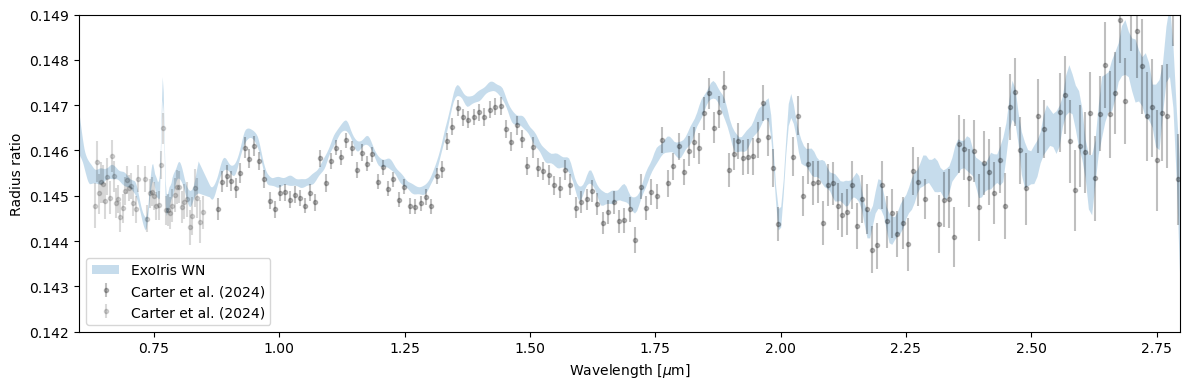

In [4]:
fig, ax = subplots(figsize=(12, 4))
ax.fill_between(sp_wn['wavelength'], 
                sp_wn['radius_ratio'] - sp_wn['radius_ratio_e'], 
                sp_wn['radius_ratio'] + sp_wn['radius_ratio_e'], 
                alpha=0.25, label='ExoIris WN')
ax.errorbar(spc1.wave,
            spc1['rp/rs'], 
            [spc1['rp/rs_err_low'], spc1['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.25, label='Carter et al. (2024)')
ax.errorbar(spc2.wave,
            spc2['rp/rs'], 
            [spc2['rp/rs_err_low'], spc2['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.15, label='Carter et al. (2024)')
#ax.plot(m.k_knots, m.posterior_samples.iloc[:, m._tsa._sl_rratios].median().values, '.k')


ax.legend()
setp(ax, xlim=sp_wn['wavelength'].data[[0,-1]], ylim=(0.142, 0.149), 
     xlabel='Wavelength [$\mu$m]', ylabel='Radius ratio')
fig.tight_layout()

## GP systematics analysis

Changing to use a Gaussian process to model the correlated noise in the spectrophotometric light curves doesn't change the spectrum much, but increases the uncertainties.

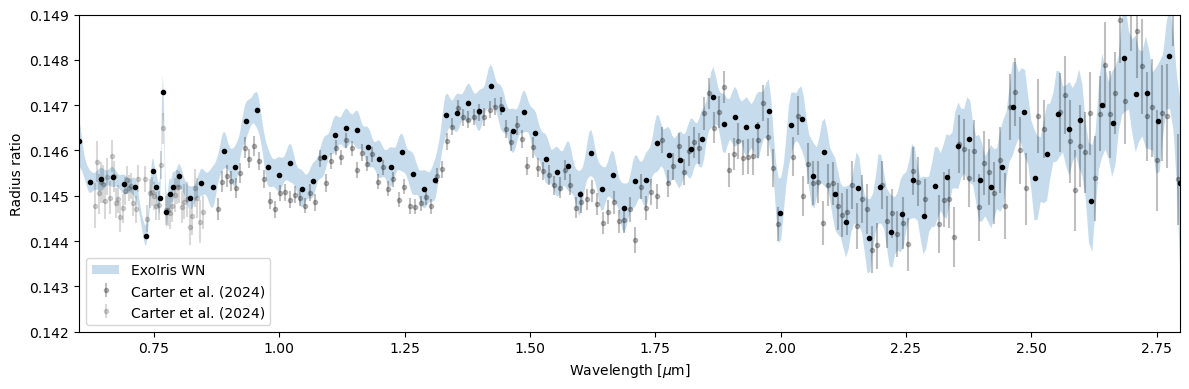

In [6]:
fig, ax = subplots(figsize=(12, 4))
ax.fill_between(sp_gp['wavelength'], 
                sp_gp['radius_ratio'] - sp_gp['radius_ratio_e'], 
                sp_gp['radius_ratio'] + sp_gp['radius_ratio_e'], 
                alpha=0.25, label='ExoIris WN')
ax.errorbar(spc1.wave,
            spc1['rp/rs'], 
            [spc1['rp/rs_err_low'], spc1['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.25, label='Carter et al. (2024)')
ax.errorbar(spc2.wave,
            spc2['rp/rs'], 
            [spc2['rp/rs_err_low'], spc2['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.15, label='Carter et al. (2024)')
ax.plot(m_gp.k_knots, m_gp.posterior_samples.iloc[:, m_gp._tsa._sl_rratios].median().values, '.k')

ax.legend()
setp(ax, xlim=sp_wn['wavelength'].data[[0,-1]], ylim=(0.142, 0.149), 
     xlabel='Wavelength [$\mu$m]', ylabel='Radius ratio')
fig.tight_layout()

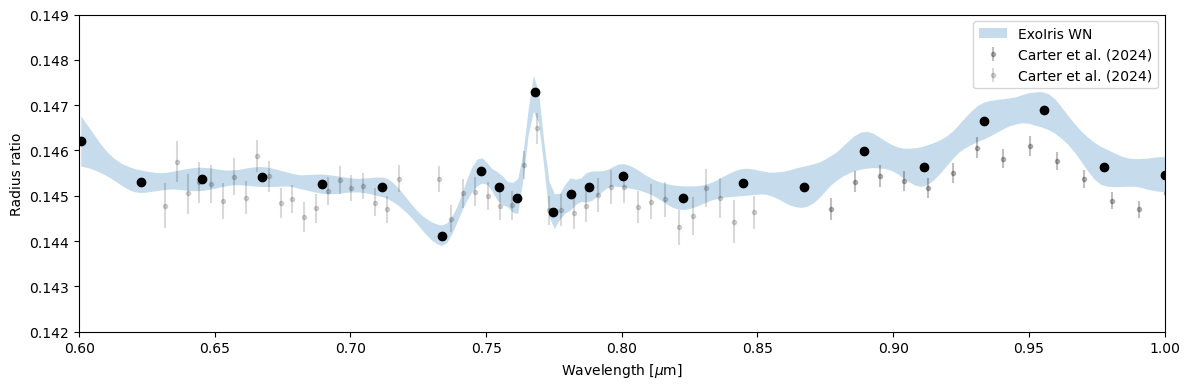

In [8]:
fig, ax = subplots(figsize=(12, 4))
ax.fill_between(sp_gp['wavelength'], 
                sp_gp['radius_ratio'] - sp_gp['radius_ratio_e'], 
                sp_gp['radius_ratio'] + sp_gp['radius_ratio_e'], 
                alpha=0.25, label='ExoIris WN')
ax.errorbar(spc1.wave,
            spc1['rp/rs'], 
            [spc1['rp/rs_err_low'], spc1['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.25, label='Carter et al. (2024)')
ax.errorbar(spc2.wave,
            spc2['rp/rs'], 
            [spc2['rp/rs_err_low'], spc2['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.15, label='Carter et al. (2024)')

ax.plot(m_gp.k_knots, m_gp.posterior_samples.iloc[:, m_gp._tsa._sl_rratios].median().values, 'ok')

ax.legend()
setp(ax, xlim=(0.6, 1.0), ylim=(0.142, 0.149), 
     xlabel='Wavelength [$\mu$m]', ylabel='Radius ratio')
fig.tight_layout()

---

<center>&copy;2025 Hannu Parviainen</center>